In [4]:
# -*- coding:utf-8 -*-

In [5]:
import pandas as pd
import numpy as np
import jieba
import os
from jieba import analyse
from bosonnlp import BosonNLP

In [6]:
with open ('shiji_original.txt', 'r') as file:
    data = file.read().rstrip('\n')

In [7]:
num_dict = {0: '', 1: '一', 2: '二', 3: '三', 4:'四', 5:'五', 6:'六', 7:'七', 8:'八', 9:'九', 10: '十'}

In [18]:
nlp = BosonNLP('fjiWZuEd.15997.EltqxuH04qpu')

In [9]:
def num_2_text(num):
    text = ''
    if num <= 10:
        text = num_dict[num]
    if num > 10 and num <= 19:
        text = '十' + num_dict[num % 10]
    if num >= 20 and num <= 99:
        text = num_dict[int(num / 10)] + '十' + num_dict[num % 10]        
    if num >= 110 and num <= 119:
        text = '一百' + '一' + num_2_text(num % 100)
    if (num >= 100 and num < 110) or (num >= 120):
        text = '一百' + num_2_text(num % 100)   
    return text

# for i in range(1, 132):
#     print(num_2_text(i))

In [10]:
shiji = pd.DataFrame(columns=['vol', 'title', 'text'])
# shiji = pd.DataFrame(columns=['vol', 'title', 'text'])

In [11]:
for i in range(1, 131):
    vol = '卷'+ num_2_text(i)
    start = data.index(vol)
    try:
        text_end = data.index('卷' + num_2_text(i + 1), start)
        text = data[start:text_end]
        title_end = data.index('\n', start + len(vol) + 1)
        title = data[start + len(vol) + 1:title_end]
    except ValueError:
        break
    temp= pd.DataFrame([[i, title, text]], columns = ['vol', 'title', 'text'])
    shiji = shiji.append(temp)
#     with open(vol + title + '.txt','w',encoding = 'utf-8') as file:
#         file.write('%s\n'%text)

In [12]:
shiji

,vol,title,text
0,1.0,五帝本纪第一,卷一·五帝本纪第一\n\n 黄帝者，少典之子，姓公孙，名曰轩辕。生而神灵，弱而能言，幼而徇...
0,2.0,夏本纪第二,卷二·夏本纪第二\n\n 夏禹，名曰文命。禹之父曰鲧，鲧之父曰帝颛顼，颛顼之父曰昌意，昌意...
0,3.0,殷本纪第三,卷三·殷本纪第三\n\n 殷契，母曰简狄，有娀氏之女，为帝喾次妃。三人行浴，见玄鸟堕其卵，...
0,4.0,周本纪第四,卷四·周本纪第四\n\n 周后稷，名弃。其母有邰氏女，曰姜原。姜原为帝喾元妃。姜原出野，见...
0,5.0,秦本纪第五,卷五·秦本纪第五\n\n 秦之先，帝颛顼之苗裔孙曰女脩。女脩织，玄鸟陨卵，女脩吞之，生子大...
0,6.0,秦始皇本纪第六,卷六·秦始皇本纪第六\n\n 秦始皇帝者，秦庄襄王子也。庄襄王为秦质子于赵，见吕不韦姬，悦...
0,7.0,项羽本纪第七,卷七·项羽本纪第七\n\n 项籍者，下相人也，字羽。初起时，年二十四。其季父项梁，梁父即楚...
0,8.0,高祖本纪第八,卷八·高祖本纪第八\n\n 高祖，沛丰邑中阳里人，姓刘氏，字季。父曰太公，母曰刘媪。其先刘...
0,9.0,吕太后本纪第九,卷九·吕太后本纪第九\n\n 吕太后者，高祖微时妃也，生孝惠帝、女鲁元太后。及高祖为汉王，...
0,10.0,孝文本纪第十,卷十·孝文本纪第十\n\n 孝文皇帝，高祖中子也。高祖十一年春，已破陈豨军，定代地，立为代...


In [13]:
shiji = shiji.assign(text_len = shiji.text.str.len()) 
#added another row and counted text lenth, cool!

In [14]:
# shiji.to_excel('foo.xlsx', sheet_name='sheet1')

In [15]:
shiji

,vol,title,text,text_len
0,1.0,五帝本纪第一,卷一·五帝本纪第一\n\n 黄帝者，少典之子，姓公孙，名曰轩辕。生而神灵，弱而能言，幼而徇...,4777
0,2.0,夏本纪第二,卷二·夏本纪第二\n\n 夏禹，名曰文命。禹之父曰鲧，鲧之父曰帝颛顼，颛顼之父曰昌意，昌意...,4312
0,3.0,殷本纪第三,卷三·殷本纪第三\n\n 殷契，母曰简狄，有娀氏之女，为帝喾次妃。三人行浴，见玄鸟堕其卵，...,3810
0,4.0,周本纪第四,卷四·周本纪第四\n\n 周后稷，名弃。其母有邰氏女，曰姜原。姜原为帝喾元妃。姜原出野，见...,10733
0,5.0,秦本纪第五,卷五·秦本纪第五\n\n 秦之先，帝颛顼之苗裔孙曰女脩。女脩织，玄鸟陨卵，女脩吞之，生子大...,10749
0,6.0,秦始皇本纪第六,卷六·秦始皇本纪第六\n\n 秦始皇帝者，秦庄襄王子也。庄襄王为秦质子于赵，见吕不韦姬，悦...,16503
0,7.0,项羽本纪第七,卷七·项羽本纪第七\n\n 项籍者，下相人也，字羽。初起时，年二十四。其季父项梁，梁父即楚...,11307
0,8.0,高祖本纪第八,卷八·高祖本纪第八\n\n 高祖，沛丰邑中阳里人，姓刘氏，字季。父曰太公，母曰刘媪。其先刘...,11983
0,9.0,吕太后本纪第九,卷九·吕太后本纪第九\n\n 吕太后者，高祖微时妃也，生孝惠帝、女鲁元太后。及高祖为汉王，...,5558
0,10.0,孝文本纪第十,卷十·孝文本纪第十\n\n 孝文皇帝，高祖中子也。高祖十一年春，已破陈豨军，定代地，立为代...,6899


In [16]:
test = shiji[:130]

In [19]:
test = test.assign(sentiment = test.text.apply(nlp.sentiment))

In [20]:
# test = test.assign(pos_sent = test.sentiment.tolist()[0][0])
# # test[test['vol'] == 1]['sentiment'].tolist()[0][0][1]
test['pos_sent'] = test['sentiment'][0].apply(lambda x: x[0][0])

In [36]:
# for i in range(len(test)):
#     test['sentiment'] = test['text'].apply(nlp.sentiment)

/Users/lifanhong/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
test.to_excel('sentiment.xlsx', sheet_name='sheet1')

In [32]:
test[test['vol'] == 1]['sentiment'].tolist()[0][0][1]

0.6279847057977785

In [101]:
test['sentiment'][0][0]

0       [[0.37201529420222146, 0.6279847057977785]]
0       [[0.8631377378083726, 0.13686226219162745]]
0       [[0.6971997566762458, 0.30280024332375416]]
0     [[0.9997760396499488, 0.0002239603500511945]]
0       [[0.5679809955883497, 0.43201900441165025]]
0        [[0.787815135887907, 0.21218486411209303]]
0      [[0.9498035464336235, 0.050196453566376434]]
0      [[0.999089277406085, 0.0009107225939150265]]
0        [[0.7974471899911709, 0.2025528100088291]]
0       [[0.7554010195310377, 0.24459898046896236]]
0      [[0.9915592321592925, 0.008440767840707474]]
0    [[0.9997586246087515, 0.00024137539124848256]]
0      [[0.9900950045436306, 0.009904995456369407]]
0        [[0.2085699121545257, 0.7914300878454743]]
0        [[0.5012783187351718, 0.4987216812648282]]
0        [[0.4382447010238264, 0.5617552989761736]]
0        [[0.6161925912615779, 0.3838074087384221]]
0       [[0.22563178301622389, 0.7743682169837761]]
0          [[0.343171564125319, 0.656828435874681]]
0       [[0.

In [33]:
type(test['sentiment'])

pandas.core.series.Series

/Users/lifanhong/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


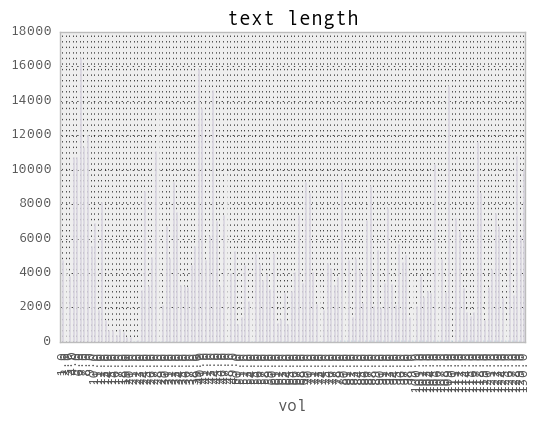

In [316]:
#try make a bar plot, not really good
pd.options.display.mpl_style = 'default'
#shiji = shiji.sort('text_len',ascending = False)[:10]
shiji_plot = shiji.plot(kind="bar",x=shiji["vol"],
                          title="text length",
                          legend=False)

In [322]:
for i in range(1, 5):
    test = shiji[shiji['vol'] == i]['text'].tolist()[0]
    tags = analyse.extract_tags(test, topK=10, withWeight=False, allowPOS=())
    textrank = analyse.textrank(test, topK=10, withWeight=False)
    print(segrank(test).head(10))
#   seg_list = jieba.cut(test, cut_all = True)
#     print(len(test))
    print("tags : " + str(tags))
    print("textrank : " + str(textrank))
#     print("Full Mode: " + "/ ".join(seg_list))
    
    

    segment  计数
368      天下  19
956      黄帝  16
123      于是  15
803      至于  12
858      诸侯  10
371      天子  10
935      颛顼   9
338      四岳   8
883      轩辕   7
718      百姓   7
tags : ['黄帝', '天下', '四岳', '颛顼', '于是', '诸侯', '天子', '至于', '帝喾', '轩辕']
textrank : ['轩辕', '百姓', '天子', '才子', '共工', '蚩尤', '颛顼', '鸟兽', '便程', '鬼神']
    segment  计数
696      至于  26
190      入于  13
117      于是  12
326      天下  12
358      子帝  11
743      诸侯   9
621      皋陶   8
573      浮于   7
203      其土   7
361      孔甲   6
tags : ['至于', '入于', '子帝', '皋陶', '其土', '浮于', '天下', '夏后', '孔甲', '诸侯']
textrank : ['入于', '予欲', '百姓', '不成', '九江', '服外', '四海', '黑水', '股肱', '水土']
    segment  计数
724      诸侯  21
147      伊尹  13
106      于是  11
710      西伯  10
326      子帝  10
619      百姓   9
302      太甲   9
521      武丁   8
13       三年   5
265      复兴   5
tags : ['诸侯', '伊尹', '子帝', '西伯', '太甲', '武丁', '于是', '百姓', '帝中', '帝外']
textrank : ['百姓', '西伯', '太甲', '弟子', '成汤', '微子', '天神', '服色', '辛立', '附命']
     segment  计数
1369      武王  38
1863      诸侯  35
8

In [353]:
test= stopwords = pd.read_csv("/Users/lifanhong/Desktop/History_dataminig/stopwords.txt", encoding='utf8', index_col=False, quoting=3, sep="\t", names = ['key'])

In [360]:
# def segrank(text):
#     segments = []
#     segs = jieba.cut(text)
#     for seg in segs:
#         if len(seg) > 0:#ignoring 1-char words
#             segments.append(seg)
#     segmentDF = pd.DataFrame({'segment':segments})
#     stopwords = pd.read_csv("/Users/lifanhong/Desktop/History_dataminig/stopwords.txt", encoding='utf8', index_col=False, quoting=3, sep="\t", names = ['key'])
#     segmentDF = segmentDF[~segmentDF.segment.isin(stopwords.key)]
#     wyStopWords = pd.Series([
#   # 42 个文言虚词 
#   '之', '其', '或', '亦', '方', '于', '即', '皆', '因', '仍', '故', 
#   '尚', '呢', '了', '的', '着', '一', '不', '乃', '呀', '吗', '咧', 
#   '啊', '把', '让', '向', '往', '是', '在', '越', '再', '更', '比', 
#   '很', '偏', '别', '好', '可', '便', '就', '但', '儿', 
#   # 高频副词 
#   '又', '也', '都', '要', 
#   # 高频代词 
#   '这', '那', '你', '我', '他',
#   #高频动词
#   '来', '去', '道', '笑', '说',
#   #空格
#   ' ', '','\n','曰'
#     ]);

#     segmentDF = segmentDF[~segmentDF.segment.isin(wyStopWords)]
#     segStat = segmentDF.groupby(by=["segment"])["segment"].agg({"计数":np.size}).reset_index().sort_values(by=["计数"],ascending=False)
#     return segStat
    
# segrank(data).to_excel('word_frequent.xlsx', sheet_name='sheet1')

# # tuples = [tuple(x) for x in seg_test.head(10).values]
# # print(tuples)

In [34]:
def seg_rank(text):
    segments = []
    segs = jieba.cut(text)
    for seg in segs:
        if len(seg) > 0:#ignoring 1-char words
            segments.append(seg)
    segmentDF = pd.DataFrame({'segment':segments})
    stopwords = pd.read_csv("stopwords.txt", encoding='utf8', index_col=False, quoting=3, sep="\t", names = ['key'])
    segmentDF = segmentDF[~segmentDF.segment.isin(stopwords.key)]
    wyStopWords = pd.Series([
  # 42 个文言虚词 
  '之', '其', '或', '亦', '方', '于', '即', '皆', '因', '仍', '故', 
  '尚', '呢', '了', '的', '着', '一', '不', '乃', '呀', '吗', '咧', 
  '啊', '把', '让', '向', '往', '是', '在', '越', '再', '更', '比', 
  '很', '偏', '别', '好', '可', '便', '就', '但', '儿', 
  # 高频副词 
  '又', '也', '都', '要', 
  # 高频代词 
  '这', '那', '你', '我', '他',
  #高频动词
  '来', '去', '道', '笑', '说',
  #空格
  ' ', '','\n','曰','使'
    ]);

    segmentDF = segmentDF[~segmentDF.segment.isin(wyStopWords)]
    segStat = segmentDF.groupby(by=["segment"])["segment"].agg({"count":np.size}).reset_index().sort_values(by=["count"],ascending=False)
    return segStat

Populating the interactive namespace from numpy and matplotlib


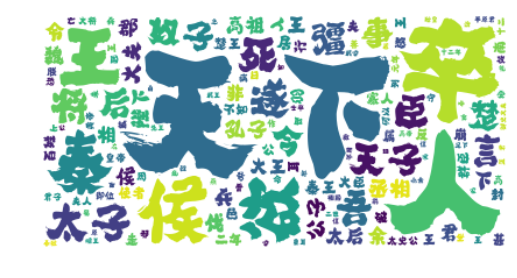

In [46]:
ranked_words = seg_rank(data)
word_frequencies = (pd.Series(ranked_words['count'].values, index=ranked_words['segment']).to_dict())
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path='白舟魂心書体.ttf', 
background_color="white"
).fit_words(word_frequencies)
%pylab inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
# wordcloud = WordCloud(
# font_path='/Users/lifanhong/Desktop/skills/设计？/sparkling/font/方正清刻本悦宋简体.TTF', 
# background_color="black",stopwords=stopwords
# ).generate(data)
# %pylab inline
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

NameError: name 'stopwords' is not defined

In [411]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# wordcloud = WordCloud(
# font_path='/Users/lifanhong/Desktop/skills/设计？/sparkling/font/方正清刻本悦宋简体.TTF', 
# background_color="black"
# )
# wordcloud = wordcloud.fit_words(segStat.head(1000).itertuples(index=False))

# plt.figure(num=None, figsize=(1000, 600), dpi=800, facecolor='w', edgecolor='k')

# wordcloud = wordcloud.fit_words(b)

# plt.imshow(wordcloud)

# # plt.close()
# # # wordcloud = WordCloud(font_path='/Users/lifanhong/Desktop/skills/设计？/sparkling/font/方正清刻本悦宋简体.TTF', background_color="black")
# # # plt.figure()
# # # plt.imshow(wordcloud, interpolation="bilinear")
# # # plt.axis("off")
# # # plt.show()
# # # # wordcloud = WordCloud(font_path='/Users/lifanhong/Desktop/skills/设计？/sparkling/font/方正清刻本悦宋简体.TTF', background_color="black")
# # # # plt.figure(num=None, figsize=(1000, 600), dpi=800, facecolor='w', edgecolor='k')
# # # # wordcloud = wordcloud.generate_from_frequencies(segStat.head(1000).itertuples(index=False))
# # # # plt.imshow(wordcloud)
# # # # plt.close()

AttributeError: 'map' object has no attribute 'items'

In [47]:
tags = analyse.extract_tags(data, topK=20, withWeight=False, allowPOS=())
textrank = analyse.textrank(data, topK=20, withWeight=False)
print("tags : " + str(tags))
print("textrank : " + str(textrank))

tags : ['诸侯', '天下', '太子', '于是', '天子', '以为', '将军', '匈奴', '孔子', '汉王', '公子', '丞相', '高祖', '大夫', '项王', '秦王', '不得', '项羽', '单于', '不能']
textrank : ['太子', '将军', '天子', '不能', '匈奴', '不得', '丞相', '公子', '不可', '陛下', '大夫', '使者', '群臣', '百姓', '项王', '淮南', '寡人', '大臣', '君子', '夫人']


In [49]:
com = [a for a in tags if a in textrank]

In [50]:
com

['太子', '天子', '将军', '匈奴', '公子', '丞相', '大夫', '项王', '不得', '不能']

In [51]:
nlp.sentiment("haha")

[[0.985757247950903, 0.014242752049096984]]

In [55]:
nlp.sentiment("帝祖庚崩，弟祖甲立，是为帝甲。帝甲淫乱，殷复衰。")

[[0.324943457186046, 0.675056542813954]]

In [63]:
from __future__ import unicode_literals

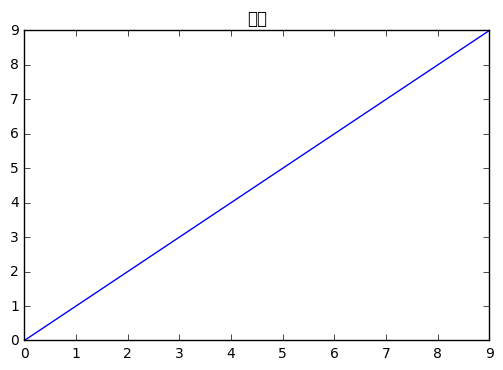

In [64]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

x = range(10)
plt.plot(x)
plt.title("中文")
plt.show()

In [219]:
from matplotlib.font_manager import FontProperties

font_simsum = FontProperties(fname="simsun.ttc")
font_yahei_consolas = FontProperties(fname="老報宋的副本.ttf")

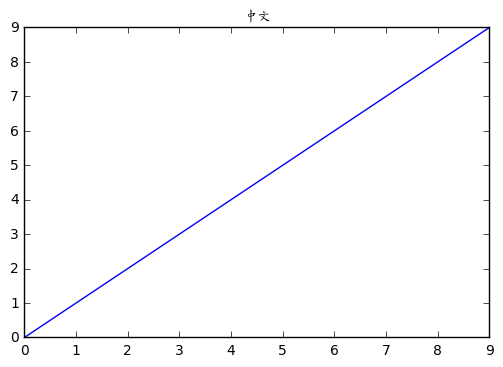

In [68]:
x = range(10)
plt.plot(x)
plt.title("中文", fontproperties=font_yahei_consolas, fontsize=14)
plt.show()

In [69]:
!ls

characters.txt            test.txt                  新蒂剪纸体.ttf
characters_clean.txt      testout.txt               史记含解释.txt
foo.xlsx                  word_cloud0.png           字酷堂黄楷体.ttf
sentiment.xlsx            word_cloud1.png           白舟白雨書体.ttf
shiji_analyze.ipynb       word_frequent.xlsx        白舟魂心書体.ttf
shiji_original.txt        ~$foo.xlsx                李旭科老报刊体.ttf
stopwords.txt             ~$word_frequent.xlsx      苏新诗古印宋简.ttf
test.py                   史记原文.txt


In [122]:
with open("characters_clean.txt") as f:
    names = [line.strip() for line in f.readlines()]

In [123]:
len(names)

538

In [135]:
def find_main_charecters(namelist, num):
    with open('shiji_original.txt') as f:
        data = f.read()
    count = []
    for name in namelist:
        count.append([name, data.count(name)])
    count.sort(key=lambda x: x[1])
    _, ax = plt.subplots()
    
    
    numbers = [x[1] for x in count[-num:]]
    names = [x[0] for x in count[-num:]]
#     rankDF = pd.DataFrame({'incidence':numbers},{'names':names})
    return count
#     ax.barh(range(num), numbers, color='red', align='center')
#     ax.set_title(novel, fontsize=14, fontproperties=font_yahei_consolas)
#     ax.set_yticks(range(num))
#     ax.set_yticklabels(names, fontsize=14, fontproperties=font_yahei_consolas)

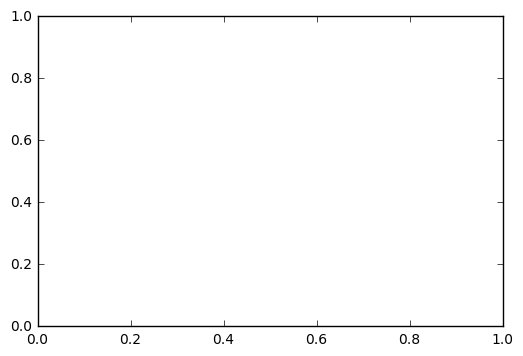

In [136]:
rank_list = find_main_charecters(names, 30)

In [137]:
rank_list

[['周文王姬昌', 0],
 ['周武王姬发', 0],
 ['周成王姬诵', 0],
 ['周康王姬钊', 0],
 ['周昭王姬瑕', 0],
 ['周穆王姬满', 0],
 ['周共王姬繄扈', 0],
 ['周懿王姬囏', 0],
 ['周孝王姬辟方', 0],
 ['周夷王姬燮', 0],
 ['周厉王姬胡', 0],
 ['周宣王姬静', 0],
 ['周幽王姬宫湦(姬宫涅)', 0],
 ['周平王姬宜臼', 0],
 ['周桓王姬林', 0],
 ['周庄王姬佗', 0],
 ['周厘王姬胡齐', 0],
 ['周惠王姬阆', 0],
 ['周襄王姬郑', 0],
 ['周顷王姬壬臣', 0],
 ['周匡王姬班', 0],
 ['周定王姬瑜', 0],
 ['周简王姬夷', 0],
 ['周灵王姬泄心', 0],
 ['周景王姬贵', 0],
 ['周悼王姬猛', 0],
 ['周敬王姬丐(姬匄)', 0],
 ['周元王姬仁', 0],
 ['周定王姬介', 0],
 ['周哀王姬去疾', 0],
 ['周思王姬叔', 0],
 ['周考王姬嵬', 0],
 ['周威烈王姬午', 0],
 ['周安王姬骄', 0],
 ['周烈王姬喜', 0],
 ['周显王姬扁', 0],
 ['周慎靓王姬定', 0],
 ['周赧王姬延', 0],
 ['秦庄公', 0],
 ['嬴世父', 0],
 ['秦宁公', 0],
 ['秦武公', 0],
 ['秦成公', 0],
 ['秦缪公嬴任好', 0],
 ['秦康公嬴罃', 0],
 ['秦共公嬴貑', 0],
 ['秦景公嬴後伯车', 0],
 ['秦惠公', 0],
 ['秦厉共公', 0],
 ['秦躁公', 0],
 ['秦怀公', 0],
 ['秦简公嬴悼子', 0],
 ['秦惠公', 0],
 ['秦出公', 0],
 ['秦孝公嬴渠梁', 0],
 ['秦惠文君嬴驷', 0],
 ['秦武王嬴荡', 0],
 ['秦昭襄王嬴则(嬴稷)', 0],
 ['秦孝文王嬴柱', 0],
 ['秦庄襄王嬴子楚', 0],
 ['秦始皇嬴政', 0],
 ['秦二世嬴胡亥', 0],
 ['秦王嬴子婴', 0],
 ['汉高祖刘邦', 0],
 ['吕太后吕雉', 0],
 ['汉文帝刘恒', 0

In [138]:
namerank = pd.DataFrame(columns = ['name', 'occurance'])
for i in range(len(rank_list)):
    namerank = namerank.append(pd.DataFrame([rank_list[i]], columns = ['name', 'occurance']))

In [140]:
namerank.to_excel('ml.xlsx', sheet_name='name_occur')

In [143]:
namer = pd.read_excel('ml.xlsx', sheetname = 'clear_data')

In [144]:
namer

,name,occurance
0,孔子,395
0,项羽,221
0,舜,164
0,太史公,161
0,禹,159
0,张仪,147
0,黄帝,130
0,平原君,118
0,尧,115
0,韩信,114


In [145]:
!pip install gensim

    100% |████████████████████████████████| 5.6MB 96kB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /Users/lifanhong/Library/Caches/pip/wheels/b0/81/ad/856aade935fceaab491a800ec4de58edb8642afa4c4ba91a00
  Running setup.py bdist_wheel for bz2file ... - \ done
  Stored in directory: /Users/lifanhong/Library/Caches/pip/wheels/31/9c/20/996d65ca104cbca940b1b053299b68459391c01c774d073126
Successfully built smart-open bz2file


In [146]:
import gensim

In [207]:
namel = []
for name in namer['name']:
    namel.append(name.replace('\n',''))
    jieba.add_word(name)

In [208]:
namel

['孔子',
 '项羽',
 '舜',
 '太史公',
 '禹',
 '张仪',
 '黄帝',
 '平原君',
 '尧',
 '韩信',
 '孟尝君',
 '张耳',
 '魏其',
 '廉颇',
 '陈余',
 '苏秦',
 '彭越',
 '袁盎',
 '赵高',
 '管仲',
 '范睢',
 '穰侯',
 '李斯',
 '甘茂',
 '春申君',
 '白起',
 '扁鹊',
 '荆轲',
 '乐毅',
 '蒙恬',
 '吴起',
 '王翦',
 '灌夫',
 '召公',
 '黥布',
 '夷吾',
 '老子',
 '田荣',
 '樊哙',
 '夫差',
 '陈涉',
 '虞卿',
 '晁错',
 '李牧',
 '卢绾',
 '赵盾',
 '窦太后',
 '伍子胥',
 '吕不韦',
 '阖庐',
 '苏代',
 '子产',
 '王夫人',
 '伯夷',
 '贾生',
 '叔孙通',
 '季布',
 '梁孝王',
 '田单',
 '周昌',
 '赵衰',
 '陈轸',
 '樗里子',
 '灌婴',
 '公孙弘',
 '申公',
 '张汤',
 '犀首',
 '蔡泽',
 '王太后',
 '王离',
 '范蠡',
 '张苍',
 '伊尹',
 '韩王信',
 '专诸',
 '武庚',
 '太伯',
 '乐乘',
 '窦婴',
 '李广',
 '主父偃',
 '颛顼',
 '周公旦',
 '甘罗',
 '淳于髡',
 '屈原',
 '田横',
 '周苛',
 '淳于髡',
 '蔺相如',
 '赵奢',
 '汲黯',
 '聂政',
 '季札',
 '吴广',
 '信陵君',
 '嫪毐',
 '刘敬',
 '董仲舒',
 '郅都',
 '邓通',
 '晏婴',
 '驺忌',
 '荀卿',
 '赵括',
 '蒙骜',
 '周文',
 '武丁',
 '造父',
 '薄太后',
 '韩非',
 '卫青',
 '豫让',
 '出子',
 '张敖',
 '魏豹',
 '田儋',
 '赵禹',
 '蚩尤',
 '韩安国',
 '优孟',
 '庞涓',
 '喾',
 '太戊',
 '叔齐',
 '庄子',
 '孙膑',
 '孟子',
 '陆贾',
 '田叔',
 '孙叔敖',
 '毕万',
 '李由',
 '栾布',
 '孔甲',
 '太甲',
 '盘庚',
 '周章',
 '叔带',


In [149]:
sentences = []
with open('shiji_original.txt') as f:
    data = [line.strip() for line in f.readlines() if line.strip()]
for line in data:
    words = list(jieba.cut(line))
    sentences.append(words)

In [192]:
sentences[:10]

[['卷', '一', '·', '五帝', '本纪', '第一'],
 ['黄帝',
  '者',
  '，',
  '少典',
  '之子',
  '，',
  '姓',
  '公孙',
  '，',
  '名曰',
  '轩辕',
  '。',
  '生而',
  '神灵',
  '，',
  '弱',
  '而',
  '能言',
  '，',
  '幼而',
  '徇齐',
  '，',
  '长而敦敏',
  '，',
  '成而',
  '聪明',
  '。',
  '轩辕',
  '之',
  '时',
  '，',
  '神农氏',
  '世衰',
  '。',
  '诸侯',
  '相',
  '侵伐',
  '，',
  '暴虐',
  '百姓',
  '，',
  '而',
  '神农氏',
  '弗',
  '能征',
  '。',
  '于是',
  '轩辕',
  '乃',
  '习用',
  '干戈',
  '，',
  '以征',
  '不享',
  '，',
  '诸侯',
  '咸',
  '来宾',
  '从',
  '。',
  '而',
  '蚩尤',
  '最为',
  '暴',
  '，',
  '莫能',
  '伐',
  '。',
  '炎帝',
  '欲',
  '侵陵',
  '诸侯',
  '，',
  '诸侯',
  '咸归',
  '轩辕',
  '。',
  '轩辕',
  '乃',
  '修德振兵',
  '，',
  '治五气',
  '，',
  '\ue0f4',
  '五种',
  '，',
  '抚',
  '万民',
  '，',
  '度',
  '四方',
  '，',
  '教熊',
  '罴',
  '貔貅',
  '貙',
  '虎',
  '，',
  '以',
  '与',
  '炎帝',
  '战于',
  '阪泉',
  '之野',
  '。',
  '三',
  '战',
  '，',
  '然后',
  '得',
  '其志',
  '。',
  '蚩尤',
  '作乱',
  '，',
  '不用',
  '帝命',
  '。',
  '于是',
  '黄帝',
  '乃徵师',
  '诸侯',
  '，',
  '与',
  '蚩尤',
  '战于',
  '涿鹿

In [150]:
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

In [151]:
model.save("shiji.model")

In [153]:
model = gensim.models.Word2Vec.load("shiji.model")

In [221]:
for k, s in model.most_similar(positive = ["项羽"]):
    print(k, s)

中 0.9970821738243103
邯郸 0.9961980581283569
发兵 0.9956808686256409
秦围 0.9950554370880127
引兵 0.9950088858604431
兵 0.9947794079780579
六月 0.9936726689338684
大将军 0.9933854937553406
败楚 0.9932849407196045
东 0.9931620955467224


In [223]:
def find_relationship(a, b, c):
    """
    返回 d
    a与b的关系，跟c与d的关系一样
    """
    d, _ = model.most_similar(positive=[c, b], negative=[a])[0]
    print("给定“{}”与“{}”，“{}”和“{}”有类似的关系".format(a, b, c, d))

find_relationship("孔子", "夫差", "太史公")

给定“孔子”与“夫差”，“太史公”和“亲亲”有类似的关系


In [209]:
all_names = []
word_vectors = None

for name in namel:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

In [210]:
from sklearn.cluster import KMeans

In [225]:
N = 3
label = KMeans(N).fit(word_vectors).labels_

for c in range(N):
    print("\n类别{}：".format(c+1))
    for idx, name in enumerate(all_names[label==c]):
        print(name),
        if idx % 10 == 9:
            print 
    print


类别1：
夫差
晁错
苏代
贾生
叔孙通
季布
梁孝王
田单
周昌
陈轸
公孙弘
申公
犀首
蔡泽
王离
范蠡
张苍
伊尹
韩王信
专诸
武庚
太伯
乐乘
窦婴
李广
主父偃
颛顼
周公旦
甘罗
淳于髡
屈原
田横
周苛
淳于髡
蔺相如
赵奢
汲黯
聂政
季札
吴广
信陵君
嫪毐
刘敬
董仲舒
郅都
邓通
晏婴
驺忌
荀卿
赵括
蒙骜
周文
武丁
造父
薄太后
韩非
卫青
豫让
出子
张敖
魏豹
田儋
赵禹
蚩尤
韩安国
优孟
庞涓
太戊
叔齐
庄子
孙膑
孟子
陆贾
田叔
孙叔敖
毕万
李由
栾布
孔甲
太甲
盘庚
周章
叔带
鲁仲连
张骞
宁成
先轸
少康
不降
成汤
秦献公
寿梦
诸樊
赵夙
赵信
曹沫
伏生
赵同
优旃
项燕
秦襄公
吴王僚
王贲
驺衍
蒙毅
郦商
郦食其
田仁
李息
王温舒
郭解
赵朔
孙武
乐羊
邹阳
公孙敖
司马相如
郑当时
杜周
司马季主
余祭
公孙贺
杨仆
李延年
白圭
武乙
帝乙
秦仲
仲雍
去齐
余眛
燕惠王
邢夫人
陈丞相
商鞅
公孙龙
魏咎
申屠嘉
李蔡
苏建
路博德
辕固生
尹齐
河亶甲
祖乙
沃甲
季胜
卫皇后
荆王刘贾
司马穰苴
墨翟
冯唐
张次公
李离
义纵
减宣

类别2：
项羽
舜
禹
张仪
黄帝
平原君
尧
韩信
孟尝君
张耳
魏其
廉颇
陈余
苏秦
彭越
袁盎
赵高
管仲
范睢
穰侯
李斯
甘茂
春申君
白起
扁鹊
荆轲
乐毅
蒙恬
吴起
王翦
灌夫
召公
黥布
夷吾
老子
田荣
樊哙
陈涉
虞卿
李牧
卢绾
赵盾
窦太后
伍子胥
吕不韦
阖庐
子产
王夫人
伯夷
赵衰
樗里子
灌婴
张汤
王太后

类别3：
孔子
太史公


In [226]:

N = 4
c = sp.stats.mode(label).mode
remain_names = all_names[label!=c]
remain_vectors = word_vectors[label!=c]

remain_label = KMeans(N).fit(remain_vectors).labels_

for c in range(N):
    print("\n类别{}：".format(c+1))
    for idx, name in enumerate(remain_names[remain_label==c]):
        print(name)
        if idx % 10 == 9:
            print() 
    print()


类别1：
舜
张仪
黄帝
平原君
尧
魏其
苏秦
袁盎
赵高
管仲

范睢
春申君
扁鹊
荆轲
灌夫


类别2：
禹
穰侯
李斯
甘茂
乐毅
蒙恬
吴起
王翦
召公
黥布

夷吾
老子
田荣
樊哙
陈涉
虞卿
李牧
卢绾
赵盾
窦太后

伍子胥
吕不韦
阖庐
子产
王夫人
伯夷
赵衰
樗里子
灌婴
张汤

王太后


类别3：
项羽
韩信
孟尝君
张耳
廉颇
陈余
彭越
白起


类别4：
孔子
太史公



In [227]:
all_names = []
word_vectors = None

for name in remain_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

In [228]:
import scipy.cluster.hierarchy as sch

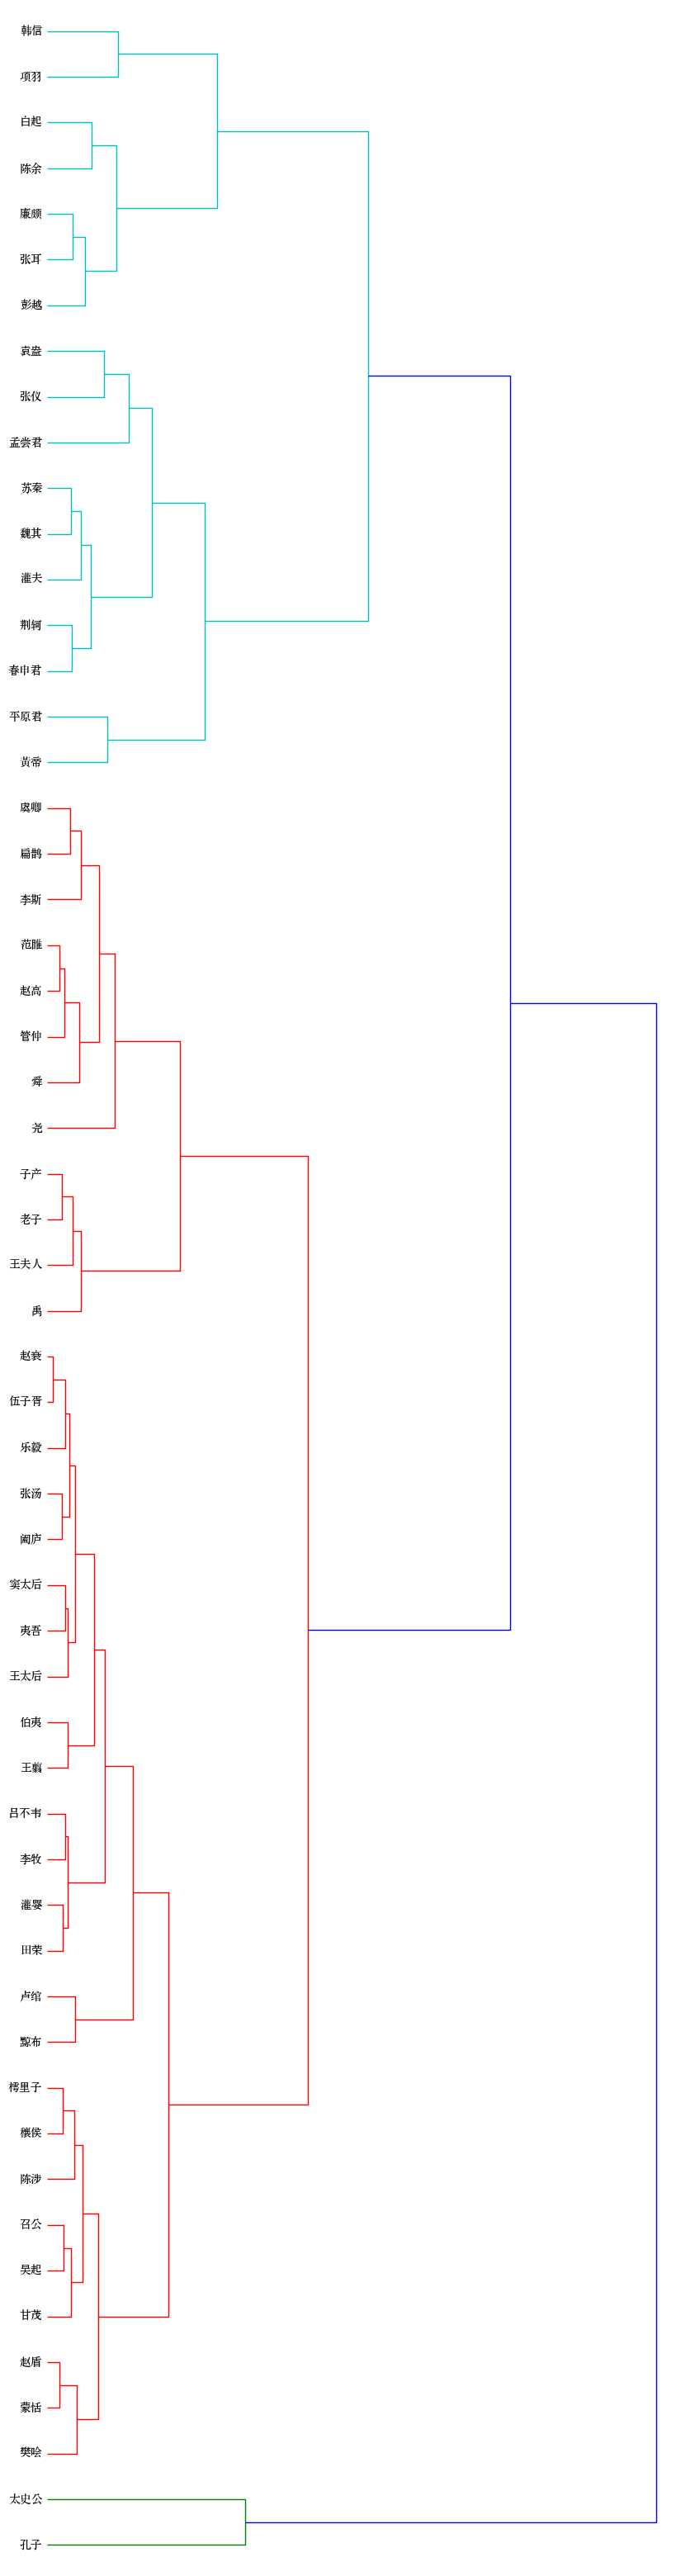

In [229]:

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 40))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()